# Introduction to Numpy

Importing Libraries
First, we need to import the NumPy library. NumPy is a powerful library for numerical computations in Python.
 It's widely used in finance for data manipulation, mathematical computations, and handling multi-dimensional arrays.

In [1]:
import numpy as np

 **Example:** Creating a NumPy array
In finance, arrays can represent things like stock prices over time or daily returns for multiple stocks.

In [2]:
stock_prices = np.array([150, 152, 149, 153, 155])  # Example: stock prices over 5 days
print("Stock Prices Array:", stock_prices)

Stock Prices Array: [150 152 149 153 155]



## Accessing Elements in an Array
 You can access individual elements using indexing. In finance, this could represent accessing a specific day's price.


In [3]:
print("Stock Price on Day 3:", stock_prices[2])

Stock Price on Day 3: 149


## Operations on Arrays
 Arrays allow you to perform mathematical operations element-wise, which is useful for financial computations like calculating daily returns.

Daily returns = (Today's price - Yesterday's price) / Yesterday's price



In [4]:
stock_prices[1:]

array([152, 149, 153, 155])

In [5]:
stock_prices[:-1]

array([150, 152, 149, 153])

In [6]:
daily_returns = (stock_prices[1:] - stock_prices[:-1]) / stock_prices[:-1]
print("Daily Returns:", daily_returns)

Daily Returns: [ 0.01333333 -0.01973684  0.02684564  0.0130719 ]


**Example:** Portfolio Returns



In [7]:
portfolio_returns = np.array([
    [0.01, -0.005, 0.002],  # Day 1 returns
    [0.02, 0.01, -0.004],   # Day 2 returns
    [-0.01, 0.002, 0.005]   # Day 3 returns
])

average_returns = np.mean(portfolio_returns, axis=0)  # Mean return for each stock
print("Average Returns for Each Stock:", average_returns)

Average Returns for Each Stock: [0.00666667 0.00233333 0.001     ]


In [8]:
# Summing Total Portfolio Return for Each Day

total_daily_returns = np.sum(portfolio_returns, axis=1)
print("Total Portfolio Return for Each Day:", total_daily_returns)

Total Portfolio Return for Each Day: [ 0.007  0.026 -0.003]


In [9]:
# Covariance Matrix

cov_matrix = np.cov(portfolio_returns.T)  # Covariance matrix of the 3 stocks
print("Covariance Matrix:\n", cov_matrix)

Covariance Matrix:
 [[ 2.33333333e-04  4.16666667e-05 -6.50000000e-05]
 [ 4.16666667e-05  5.63333333e-05 -2.35000000e-05]
 [-6.50000000e-05 -2.35000000e-05  2.10000000e-05]]


! Warning  
If you are using return instead of log retrun you cannot get simple mean and sum for total return.

## Reshaping Arrays

In [10]:
array = np.array([1, 2, 3, 4, 5, 6])  # Example: 1D array of 6 elements
reshaped_array = array.reshape(2, 3)  # Reshaping to 2 rows and 3 columns
print("Original Array:", array)
print("Reshaped Array (2x3):\n", reshaped_array)

Original Array: [1 2 3 4 5 6]
Reshaped Array (2x3):
 [[1 2 3]
 [4 5 6]]


**Vertical Stacking (vstack)**


In [11]:
# vstack stacks arrays vertically (row-wise). Useful when combining datasets with the same number of columns.

array1 = np.array([1, 2, 3])
array2 = np.array([4, 5, 6])
vertical_stack = np.vstack((array1, array2))
print("Vertical Stack:\n", vertical_stack)

Vertical Stack:
 [[1 2 3]
 [4 5 6]]


**Horizontal Stacking (hstack)**

In [12]:

# hstack stacks arrays horizontally (column-wise). Useful when appending features to a dataset.

horizontal_stack = np.hstack((array1, array2))
print("Horizontal Stack:", horizontal_stack)



Horizontal Stack: [1 2 3 4 5 6]


**Concatenation**

In [13]:
# Concatenation generalizes stacking by allowing you to combine arrays along a specified axis.

concat_array = np.concatenate((array1.reshape(1, -1), array2.reshape(1, -1)), axis=0)
print("Concatenated Array:\n", concat_array)

Concatenated Array:
 [[1 2 3]
 [4 5 6]]


## Random Walk Simulation

 A common use of NumPy in finance is to simulate stock prices using a random walk model. This can help model potential future prices.

### Geometric Brownian Motion (GBM)

Geometric Brownian Motion (GBM) is a mathematical model used to describe the dynamics of a stock price or other financial asset over time. It is defined by the following stochastic differential equation (SDE):

$
dS_t = \mu S_t \, dt + \sigma S_t \, dW_t
$

#### Explanation of Terms:

1. **$ S_t $**: The price of the asset at time $ t $.
2. **$ \mu $**: The drift rate (mean rate of return) of the asset.
3. **$ \sigma$**: The volatility of the asset (standard deviation of returns).
4. **$ W_t $**: A Wiener process (or standard Brownian motion), which models the random fluctuations of the asset price.
5. **$ dt $**: An infinitesimally small time interval.


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import time
# Parameters for GBM
np.random.seed(42)  # For reproducibility
S0 = 100            # Initial stock price
mu = 0.05           # Drift (annualized return)
sigma = 0.2         # Volatility (annualized standard deviation)
T = 1               # Time horizon in years
steps = 252         # Number of steps (daily steps for a year)
paths = 1000         # Number of paths to simulate

# Time increments
dt = T / steps

# Initialize paths array
gbm_paths = np.zeros((steps + 1, paths))
gbm_paths[0] = S0  # Initial price for all paths

current_time = time.time()
# Simulate paths using a loop for each path
for p in range(paths):
    for t in range(1, steps + 1):
        z = np.random.normal(0, 1)  # Generate a single random noise for this step
        gbm_paths[t, p] = gbm_paths[t - 1, p] *(1 + mu *dt)  + gbm_paths[t - 1, p] *sigma * np.sqrt(dt) * z

end_time = time.time()
execution_time = end_time - current_time
print(f"Execution time: {execution_time} seconds")


Execution time: 1.2782931327819824 seconds


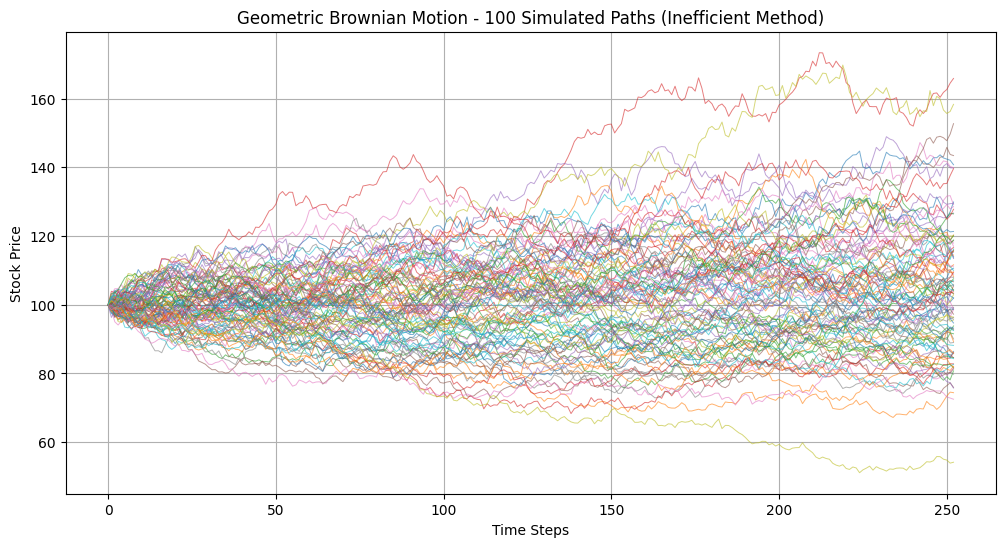

In [15]:
# Plot the GBM paths
plt.figure(figsize=(12, 6))
for i in range(100):
    plt.plot(gbm_paths[:, i], lw=0.7, alpha=0.6)
plt.title('Geometric Brownian Motion - 100 Simulated Paths (Inefficient Method)')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.grid(True)
plt.show()

# Do not use for loop in python as much as you can!

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for GBM
np.random.seed(42)  # For reproducibility
S0 = 100            # Initial stock price
mu = 0.05           # Drift (annualized return)
sigma = 0.2         # Volatility (annualized standard deviation)
T = 1               # Time horizon in years
steps = 252         # Number of steps (daily steps for a year)
paths = 1000         # Number of paths to simulate

# Time increments
dt = T / steps

# Simulate GBM paths
gbm_paths = np.zeros((steps + 1, paths))
gbm_paths[0] = S0  # Initial price for all paths
current_time = time.time()
# Simulate paths using a loop for each path
for t in range(1, steps + 1):
    # Generate random noise
    z = np.random.normal(0, 1, paths)
    # Compute the price at time t
    gbm_paths[t] = gbm_paths[t - 1] * (1 + mu *dt) +  gbm_paths[t - 1] *sigma * np.sqrt(dt) * z
end_time = time.time()
execution_time = end_time - current_time
print(f"Execution time: {execution_time} seconds")


Execution time: 0.01637887954711914 seconds


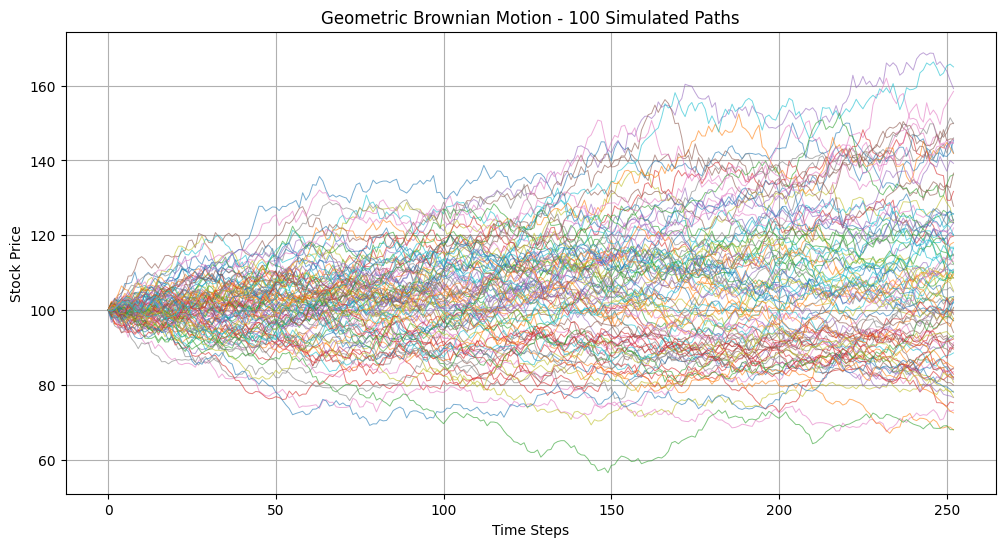

In [17]:
# Plot the GBM paths
plt.figure(figsize=(12, 6))
for i in range(100):
    plt.plot(gbm_paths[:, i], lw=0.7, alpha=0.6)
plt.title('Geometric Brownian Motion - 100 Simulated Paths')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.grid(True)
plt.show()


# Pandas

## Importing Libraries

In [18]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

 ## Fetching NVIDIA Stock Data

In [19]:

start_date = "2020-01-01"
end_date = "2025-01-01"
nvda_data = yf.download("NVDA", start=start_date, end=end_date)

/tmp/ipython-input-349924913.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  nvda_data = yf.download("NVDA", start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


In [20]:
nvda_data

Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2020-01-02,5.971077,5.971077,5.891682,5.942206,237536000
2020-01-03,5.875505,5.919310,5.826474,5.851363,205384000
2020-01-06,5.900144,5.905371,5.756038,5.782171,262636000
2020-01-07,5.971576,6.017371,5.883469,5.928518,314856000
2020-01-08,5.982775,6.024090,5.927273,5.967344,277108000
...,...,...,...,...,...
2024-12-24,140.181656,141.861189,138.612078,139.961715,105157000
2024-12-26,139.891739,140.811501,137.692343,139.661806,116205600


In [21]:

start_date = "2020-01-01"
end_date = "2025-01-01"
nvda_data_raw = yf.download("NVDA", start=start_date, end=end_date)

# Rename the columns to remove potential multi-index
nvda_data_raw.columns = ["Close", "High", "Low", "Open", "Volume"]

# Display the first few rows
nvda_data_raw.head()


/tmp/ipython-input-1306903132.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  nvda_data_raw = yf.download("NVDA", start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


,Close,High,Low,Open,Volume
Date,,,,,
2020-01-02,5.971077,5.971077,5.891682,5.942206,237536000
2020-01-03,5.875505,5.919310,5.826474,5.851363,205384000
2020-01-06,5.900144,5.905371,5.756038,5.782171,262636000
2020-01-07,5.971576,6.017371,5.883469,5.928518,314856000
2020-01-08,5.982775,6.024090,5.927273,5.967344,277108000


In [22]:
nvda_data_raw.columns

Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [23]:
print("\nData Information:")
nvda_data_raw.info()


Data Information:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2020-01-02 to 2024-12-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Open    1258 non-null   float64
 4   Volume  1258 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 59.0 KB


In [24]:
print("\nDescriptive Statistics:")
nvda_data_raw.describe()




Descriptive Statistics:


,Close,High,Low,Open,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,38.435435,39.145594,37.661364,38.439838,4.467728e+08
std,38.223426,38.933804,37.479079,38.284822,1.876933e+08
min,4.891088,5.228284,4.499602,4.983232,9.788400e+07
25%,13.569523,13.820626,13.334572,13.601541,3.084230e+08
50%,21.232124,21.738721,20.818902,21.166506,4.205830e+08
75%,45.614003,46.193448,44.958323,45.738408,5.467242e+08
max,148.829041,152.837669,146.209911,149.298887,1.543911e+09


In [25]:
# Check for missing values
print("\nChecking for Missing Values:")
print(nvda_data_raw.isnull().sum())



Checking for Missing Values:
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64


## Data Cleaning

In [26]:
# Rename columns for better readability
nvda_data_raw.reset_index(inplace=True)  # Ensure 'Date' is a column, not an index


nvda_data_raw

,Date,Close,High,Low,Open,Volume
0,2020-01-02,5.971077,5.971077,5.891682,5.942206,237536000
1,2020-01-03,5.875505,5.919310,5.826474,5.851363,205384000
2,2020-01-06,5.900144,5.905371,5.756038,5.782171,262636000
3,2020-01-07,5.971576,6.017371,5.883469,5.928518,314856000
4,2020-01-08,5.982775,6.024090,5.927273,5.967344,277108000
...,...,...,...,...,...,...
1253,2024-12-24,140.181656,141.861189,138.612078,139.961715,105157000
1254,2024-12-26,139.891739,140.811501,137.692343,139.661806,116205600
1255,2024-12-27,136.972519,138.981979,134.673160,138.512106,170582600
1256,2024-12-30,137.452393,140.231631,133.983341,134.793117,167734700


In [27]:
# Handle missing values
nvda_data_raw.fillna(method="ffill", inplace=True)

print("\nCleaned Data:")
nvda_data_raw.head()




Cleaned Data:


/tmp/ipython-input-621695180.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  nvda_data_raw.fillna(method="ffill", inplace=True)


,Date,Close,High,Low,Open,Volume
0,2020-01-02,5.971077,5.971077,5.891682,5.942206,237536000
1,2020-01-03,5.875505,5.919310,5.826474,5.851363,205384000
2,2020-01-06,5.900144,5.905371,5.756038,5.782171,262636000
3,2020-01-07,5.971576,6.017371,5.883469,5.928518,314856000
4,2020-01-08,5.982775,6.024090,5.927273,5.967344,277108000


In [28]:
!pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=a97400d5debee483eaf353763e479490c2aab71233ef88a0a34fa82aafb5bb3a
  Stored in directory: /root/.cache/pip/wheels/5c/a1/5f/c6b85a7d9452057be4ce68a8e45d77ba34234a6d46581777c6
Successfully built ta


# Features

## Moving Average Convergence Divergence (MACD)

The **Moving Average Convergence Divergence (MACD)** is a technical indicator used in financial analysis to identify trends and potential buy/sell signals based on the relationship between moving averages of an asset's price.

---

### 1. Exponential Moving Average (EMA)

The **Exponential Moving Average (EMA)** of a time series $P_t$ is calculated recursively as:

$$
\text{EMA}_t^{(\alpha)} =
\begin{cases}
P_t & \text{if } t = 1, \\
\alpha P_t + (1 - \alpha) \text{EMA}_{t-1}^{(\alpha)} & \text{if } t > 1,
\end{cases}
$$

where the smoothing factor \( \alpha \) is defined as:

$$
\alpha = \frac{2}{N+1},
$$

and \( N \) is the number of periods used for the moving average.

Alternatively, the EMA can be expressed explicitly using weighted summation:

$$
\text{EMA}_t^{(\alpha)} = \sum_{i=0}^{t-1} \alpha (1 - \alpha)^i P_{t-i}.
$$

---

### 2. MACD Line

The **MACD Line** is the difference between two EMAs of the price series, calculated over different time periods:

$$
\text{MACD}_t = \text{EMA}_t^{(\alpha_{\text{short}})} - \text{EMA}_t^{(\alpha_{\text{long}})},
$$

where:
- $ \alpha_{\text{short}} = \frac{2}{N_{\text{short}}+1}$ for the short-term EMA (e.g., $ N_{\text{short}} = 12 $ days),
- $ \alpha_{\text{long}} = \frac{2}{N_{\text{long}}+1} $ for the long-term EMA (e.g., $ N_{\text{long}} = 26 $ days).

---

### 3. Signal Line

The **Signal Line** is the EMA of the MACD line itself, typically computed over a shorter period $ N_{\text{signal}} $ (e.g., $ N_{\text{signal}} = 9 $ days):

$$
\text{Signal}_t = \text{EMA}_t^{(\alpha_{\text{signal}})} \quad \text{of } \text{MACD}_t,
$$

where $ \alpha_{\text{signal}} = \frac{2}{N_{\text{signal}}+1} $.

---


## Relative Strength Index (RSI)

The **Relative Strength Index (RSI)** is a momentum oscillator that measures the speed and change of price movements, ranging from 0 to 100. It helps identify overbought and oversold conditions.

---

### RSI Calculation

1. **Gain and Loss**:
   - Gain: $ \text{Gain}_t = \max(P_t - P_{t-1}, 0) $
   - Loss: $ \text{Loss}_t = \max(P_{t-1} - P_t, 0) $

2. **Average Gain and Loss** (initially over $ N $ periods, typically $ N = 14 $):
   - $ \text{Avg Gain}_t = \frac{\sum_{i=0}^{N-1} \text{Gain}_{t-i}}{N} $
   - $ \text{Avg Loss}_t = \frac{\sum_{i=0}^{N-1} \text{Loss}_{t-i}}{N} $

   Afterward, averages are smoothed:
   - $ \text{Avg Gain}_t = \frac{(N-1) \cdot \text{Avg Gain}_{t-1} + \text{Gain}_t}{N} $
   - $ \text{Avg Loss}_t = \frac{(N-1) \cdot \text{Avg Loss}_{t-1} + \text{Loss}_t}{N} $

3. **Relative Strength (RS)**:
   - $ \text{RS}_t = \frac{\text{Avg Gain}_t}{\text{Avg Loss}_t} $

4. **RSI**:
   - $ \text{RSI}_t = 100 - \frac{100}{1 + \text{RS}_t} $

---

### Interpretation

- **Overbought**: $ \text{RSI} > 70 $
- **Oversold**: $ \text{RSI} < 30 $
- **Neutral**: $ 30 \leq \text{RSI} \leq 70 $

The RSI is used to detect potential reversals, momentum strength, and overbought/oversold conditions.


In [29]:

from ta.momentum import RSIIndicator
from ta.trend import SMAIndicator, EMAIndicator, MACD

def compute_technical_indicators(data):
    """
    Computes technical indicators for a given dataset of a stock.

    Parameters:
    - data (pd.DataFrame): DataFrame containing stock data with columns:
                           ['Open', 'High', 'Low', 'Close', 'Volume']

    Returns:
    - pd.DataFrame: Enhanced DataFrame with additional columns for technical indicators and lagged returns.
    """
    # Ensure the dataset has the required columns
    required_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
    if not all(col in data.columns for col in required_columns):
        raise ValueError(f"Dataset must contain the following columns: {required_columns}")

    # Simple Moving Average (SMA)
    data['SMA_20'] = SMAIndicator(close=data['Close'], window=20).sma_indicator()
    data['SMA_50'] = SMAIndicator(close=data['Close'], window=50).sma_indicator()

    # Exponential Moving Average (EMA)
    data['EMA_20'] = EMAIndicator(close=data['Close'], window=20).ema_indicator()
    data['EMA_50'] = EMAIndicator(close=data['Close'], window=50).ema_indicator()

    # Relative Strength Index (RSI)
    data['RSI'] = RSIIndicator(close=data['Close'], window=14).rsi()

    # Moving Average Convergence Divergence (MACD)
    macd_indicator = MACD(close=data['Close'], window_slow=26, window_fast=12, window_sign=9)
    data['MACD'] = macd_indicator.macd()
    data['MACD_Signal'] = macd_indicator.macd_signal()

    # Returns and lagged returns
    data['Return'] = (data['Close']).pct_change()
    data['Lag_Return_1'] = data['Return'].shift(1)
    data['Lag_Return_2'] = data['Return'].shift(2)
    data['Lag_Return_3'] = data['Return'].shift(3)

    # Tomorrow's return (forward-looking)
    data['Tomorrow_Return'] = data['Return'].shift(-1)

    # Dropping NaN values caused by rolling calculations
    data = data.dropna()

    return data



##6. Visualization

In [30]:
nvda_data = compute_technical_indicators(nvda_data_raw)

In [31]:
nvda_data

,Date,Close,High,Low,Open,Volume,SMA_20,SMA_50,EMA_20,EMA_50,RSI,MACD,MACD_Signal,Return,Lag_Return_1,Lag_Return_2,Lag_Return_3,Tomorrow_Return
49,2020-03-13,5.997809,6.002292,5.469103,5.740304,634836000,6.729482,6.404862,6.450792,6.416552,44.435977,-0.139947,0.004274,0.113402,-0.122368,-0.055960,0.063722,-0.184521
50,2020-03-16,4.891088,5.630729,4.831320,5.289797,726972000,6.613410,6.383262,6.302249,6.356730,35.289277,-0.244548,-0.045490,-0.184521,0.113402,-0.122368,-0.055960,0.106263
51,2020-03-17,5.410829,5.500234,4.756609,5.003404,833632000,6.514887,6.373968,6.217352,6.319635,41.390681,-0.282253,-0.092843,0.106263,-0.184521,0.113402,-0.122368,-0.066507
52,2020-03-18,5.050970,5.228284,4.499602,4.983232,874268000,6.375810,6.356985,6.106268,6.269884,38.671869,-0.337284,-0.141731,-0.066507,0.106263,-0.184521,0.113402,0.050044
53,2020-03-19,5.303743,5.397381,4.816128,5.029553,765512000,6.256838,6.343628,6.029837,6.231996,41.574945,-0.356391,-0.184663,0.050044,-0.066507,0.106263,-0.184521,-0.033901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,2024-12-23,139.631790,139.751752,135.083032,136.242718,176053500,136.918704,139.672607,136.669100,136.137772,53.425785,-1.653339,-1.352978,0.036897,0.030762,0.013730,-0.011350,0.003938
1253,2024-12-24,140.181656,141.861189,138.612078,139.961715,105157000,137.129115,139.715785,137.003629,136.296355,54.123011,-1.154466,-1.313275,0.003938,0.036897,0.030762,0.013730,-0.002068
1254,2024-12-26,139.891739,140.811501,137.692343,139.661806,116205600,137.280045,139.882520,137.278687,136.437351,53.666832,-0.773582,-1.205337,-0.002068,0.003938,0.036897,0.030762,-0.020868
1255,2024-12-27,136.972519,138.981979,134.673160,138.512106,170582600,137.363988,139.908500,137.249528,136.458338,49.172606,-0.699225,-1.104114,-0.020868,-0.002068,0.003938,0.036897,0.003503


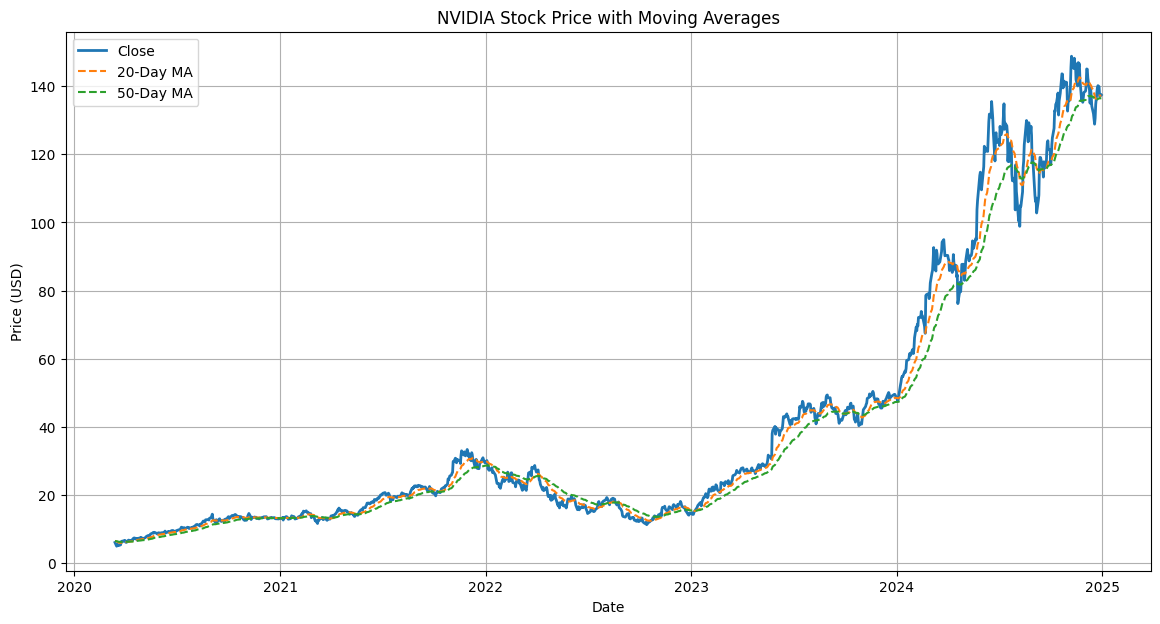

In [32]:

# Plot Adjusted Close and Moving Averages
plt.figure(figsize=(14, 7))
plt.plot(nvda_data["Date"], nvda_data["Close"], label="Close", linewidth=2)
plt.plot(nvda_data["Date"], nvda_data["EMA_20"], label="20-Day MA", linestyle="--")
plt.plot(nvda_data["Date"], nvda_data["EMA_50"], label="50-Day MA", linestyle="--")
plt.title("NVIDIA Stock Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid()
plt.show()



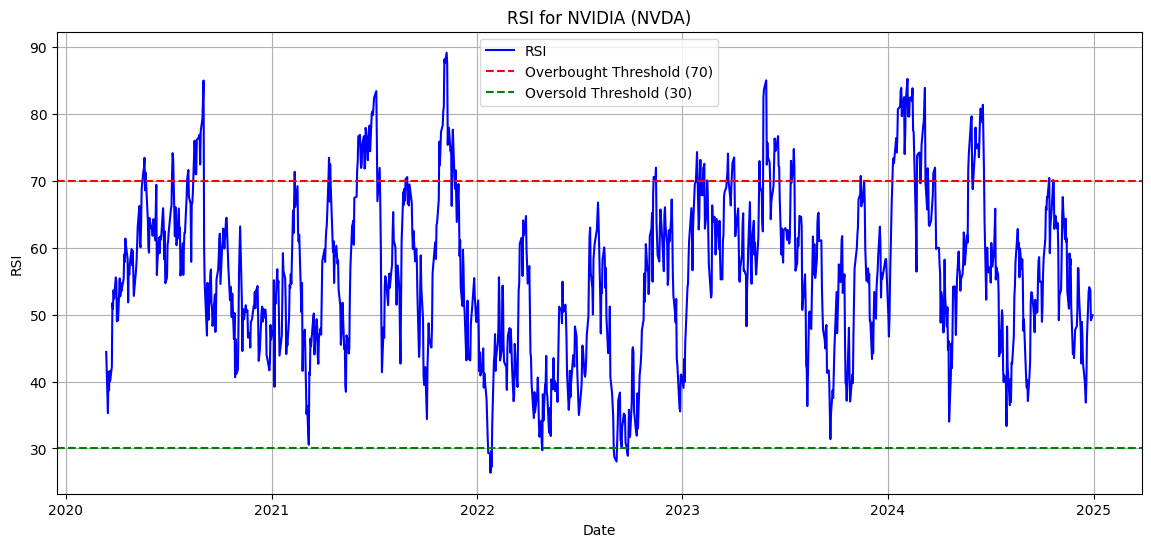

In [33]:
# Plot RSI
plt.figure(figsize=(14, 6))
plt.plot(nvda_data['Date'], nvda_data['RSI'], label='RSI', color='blue')
plt.axhline(70, color='red', linestyle='--', label='Overbought Threshold (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold Threshold (30)')
plt.title('RSI for NVIDIA (NVDA)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.grid()
plt.show()



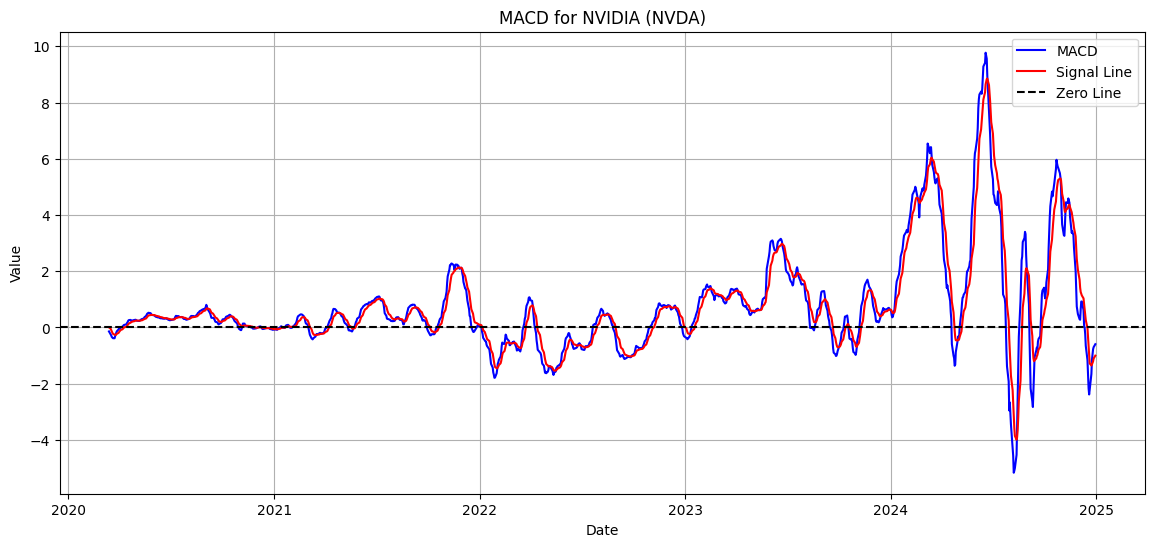

In [34]:
# Plot MACD and Signal Line
plt.figure(figsize=(14, 6))
plt.plot(nvda_data['Date'], nvda_data['MACD'], label='MACD', color='blue')
plt.plot(nvda_data['Date'], nvda_data['MACD_Signal'], label='Signal Line', color='red')
plt.axhline(0, color='black', linestyle='--', label='Zero Line')
plt.title('MACD for NVIDIA (NVDA)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

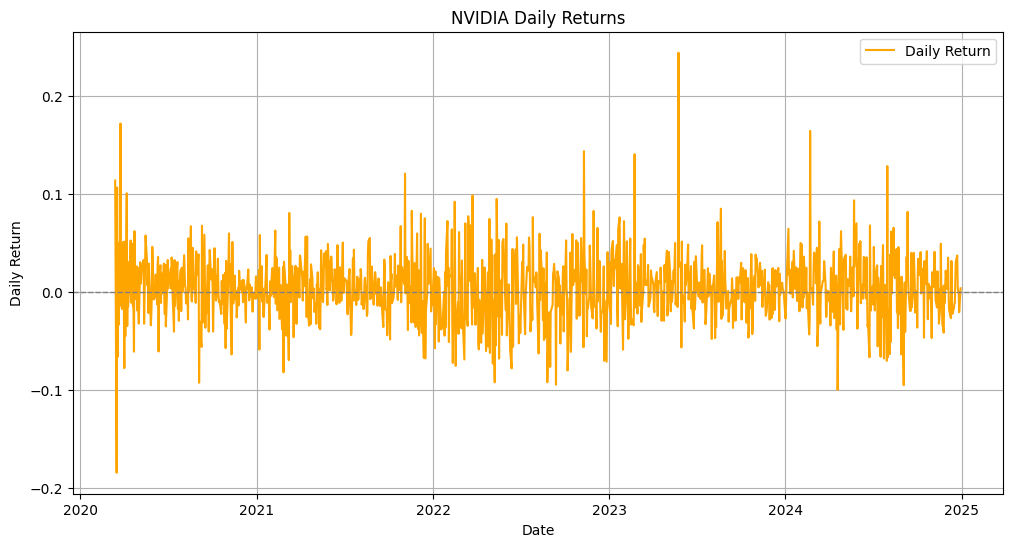

In [35]:
# Plot Daily Returns
plt.figure(figsize=(12, 6))
plt.plot(nvda_data["Date"], nvda_data["Return"], label="Daily Return", color="orange")
plt.axhline(y=0, color="gray", linestyle="--", linewidth=1)
plt.title("NVIDIA Daily Returns")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.legend()
plt.grid()
plt.show()




In [36]:
nvda_data

,Date,Close,High,Low,Open,Volume,SMA_20,SMA_50,EMA_20,EMA_50,RSI,MACD,MACD_Signal,Return,Lag_Return_1,Lag_Return_2,Lag_Return_3,Tomorrow_Return
49,2020-03-13,5.997809,6.002292,5.469103,5.740304,634836000,6.729482,6.404862,6.450792,6.416552,44.435977,-0.139947,0.004274,0.113402,-0.122368,-0.055960,0.063722,-0.184521
50,2020-03-16,4.891088,5.630729,4.831320,5.289797,726972000,6.613410,6.383262,6.302249,6.356730,35.289277,-0.244548,-0.045490,-0.184521,0.113402,-0.122368,-0.055960,0.106263
51,2020-03-17,5.410829,5.500234,4.756609,5.003404,833632000,6.514887,6.373968,6.217352,6.319635,41.390681,-0.282253,-0.092843,0.106263,-0.184521,0.113402,-0.122368,-0.066507
52,2020-03-18,5.050970,5.228284,4.499602,4.983232,874268000,6.375810,6.356985,6.106268,6.269884,38.671869,-0.337284,-0.141731,-0.066507,0.106263,-0.184521,0.113402,0.050044
53,2020-03-19,5.303743,5.397381,4.816128,5.029553,765512000,6.256838,6.343628,6.029837,6.231996,41.574945,-0.356391,-0.184663,0.050044,-0.066507,0.106263,-0.184521,-0.033901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,2024-12-23,139.631790,139.751752,135.083032,136.242718,176053500,136.918704,139.672607,136.669100,136.137772,53.425785,-1.653339,-1.352978,0.036897,0.030762,0.013730,-0.011350,0.003938
1253,2024-12-24,140.181656,141.861189,138.612078,139.961715,105157000,137.129115,139.715785,137.003629,136.296355,54.123011,-1.154466,-1.313275,0.003938,0.036897,0.030762,0.013730,-0.002068
1254,2024-12-26,139.891739,140.811501,137.692343,139.661806,116205600,137.280045,139.882520,137.278687,136.437351,53.666832,-0.773582,-1.205337,-0.002068,0.003938,0.036897,0.030762,-0.020868
1255,2024-12-27,136.972519,138.981979,134.673160,138.512106,170582600,137.363988,139.908500,137.249528,136.458338,49.172606,-0.699225,-1.104114,-0.020868,-0.002068,0.003938,0.036897,0.003503


In [38]:
nvda_data.set_index('Date', inplace=True) # inplace means replace the original data frame

In [39]:
montly_return = nvda_data['Return'].resample('M').sum()

/tmp/ipython-input-266145346.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  montly_return = nvda_data['Return'].resample('M').sum()


In [41]:
realized_volatility = nvda_data['Return'].resample('M').std() *  np.sqrt(25)

/tmp/ipython-input-2277383130.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  realized_volatility = nvda_data['Return'].resample('M').std() *  np.sqrt(25)


In [42]:
realized_volatility

,Return
Date,
2020-03-31,0.450638
2020-04-30,0.220429
2020-05-31,0.136644
2020-06-30,0.119472
2020-07-31,0.103880
2020-08-31,0.121870
2020-09-30,0.199209
2020-10-31,0.127516
2020-11-30,0.156342


In [43]:
result = pd.DataFrame({
        'Monthly_Return': montly_return,
        'Realized_Volatility': realized_volatility
    })

In [44]:
result

,Monthly_Return,Realized_Volatility
Date,,
2020-03-31,0.248956,0.450638
2020-04-30,0.122833,0.220429
2020-05-31,0.202475,0.136644
2020-06-30,0.074378,0.119472
2020-07-31,0.116009,0.103880
2020-08-31,0.238187,0.121870
2020-09-30,0.027971,0.199209
2020-10-31,-0.069494,0.127516
2020-11-30,0.076402,0.156342


In [45]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
import numpy as np

### Distribution of returns & Fat tail distribution  

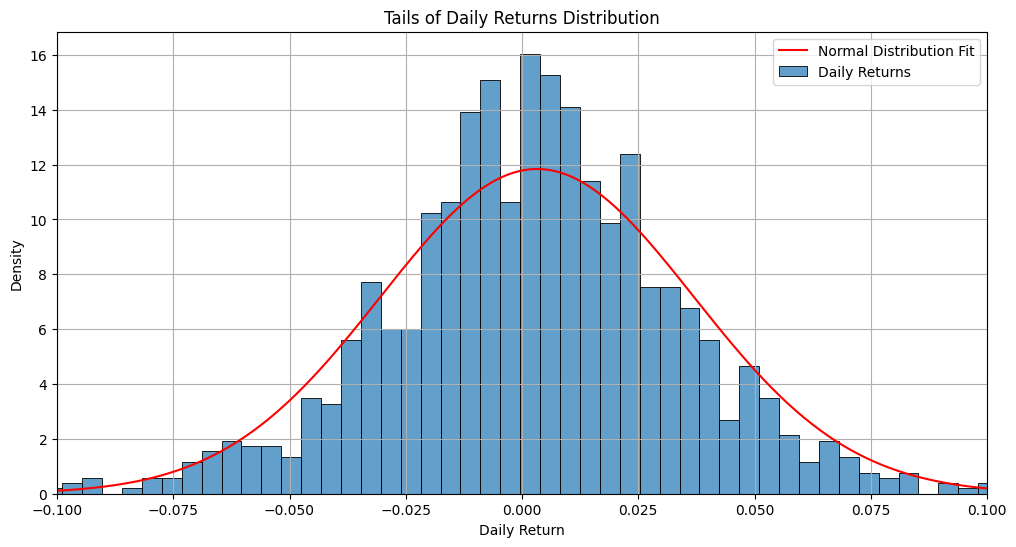

In [46]:
# Fit a normal distribution to the daily returns
mean_return = nvda_data["Return"].mean()
std_return = nvda_data["Return"].std()

# Generate a normal distribution curve
x = np.linspace(nvda_data["Return"].min(), nvda_data["Return"].max(), 1000)
pdf = norm.pdf(x, mean_return, std_return)




# Compare the tails
plt.figure(figsize=(12, 6))
sns.histplot(nvda_data["Return"], bins=100, kde=False, label="Daily Returns", stat="density", alpha=0.7)
plt.plot(x, pdf, color="red", label="Normal Distribution Fit")
plt.xlim(-0.1,0.1)
plt.title("Tails of Daily Returns Distribution")
plt.xlabel("Daily Return")
plt.ylabel("Density")
plt.legend()
plt.grid()
plt.show()

In [47]:
std_return

0.0336907377035557

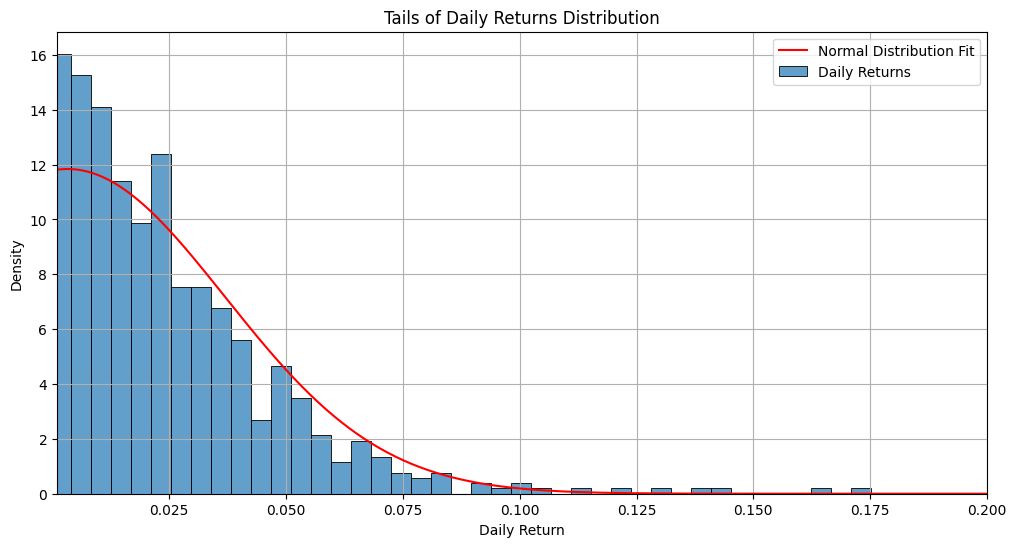

In [48]:
plt.figure(figsize=(12, 6))
sns.histplot(nvda_data["Return"], bins=100, kde=False, label="Daily Returns", stat="density", alpha=0.7)
plt.plot(x, pdf, color="red", label="Normal Distribution Fit")
plt.xlim(0.001,0.2)  # Focus on the tails
plt.title("Tails of Daily Returns Distribution")
plt.xlabel("Daily Return")
plt.ylabel("Density")
plt.legend()
plt.grid()
plt.show()

In [49]:
# Compute the probability that the normal distribution is greater than 0.1
probability_greater_0_1 = 1 - norm.cdf(0.1, loc=mean_return, scale=std_return)
probability_greater_0_1


np.float64(0.0020405949182203953)

In [50]:
np.sum(nvda_data["Return"] > 0.1)/len(nvda_data)

np.float64(0.008278145695364239)

As we can see the probabilty of tail in real data is more that 3 times to the probabilty of the tail normal distribution

In [51]:
nvda_data.to_csv("nvda_stock_data.csv", index=False)